# 2. Логистическая регрессия

✍ Ранее мы обсуждали модель линейной регрессии, которая предназначена для решения задачи регрессии. Теперь нам предстоит разобраться с тем, как преобразовать данную модель, чтобы она решала задачу классификации.

Для начала вспомним, что такое классификация.

Задача классификации (classification) — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является категориальным.

Когда классов, которые мы хотим предсказать, только два, классификация называется бинарной. Например, мы можем предсказать, болен ли пациент раком, является ли изображение человеческим лицом, является ли письмо спамом и т. д.

Когда классов, которые мы хотим предсказать, более двух, классификация называется мультиклассовой (многоклассовой). Например, предсказание модели самолёта по радиолокационным снимкам, классификация животных на фотографиях, определение языка, на котором говорит пользователь, разделение писем на группы.

img

→ Для простоты мы пока разберёмся с бинарной классификацией, а в следующем юните обобщим результат на мультиклассовую.

Что вообще означает «решить задачу классификации»? Это значит построить разделяющую поверхность в пространстве признаков, которая делит пространство на части, каждая из которых соответствует определённому классу. 

Ниже представлены примеры разделяющих поверхностей, которые производят бинарную классификацию. Красным и синим цветом обозначены классы, зелёным — собственно поверхность, которая делит пространство признаков на две части. В каждой из этих частей находятся только наблюдения определённого класса.
img
Источник изображения

Модели, которые решают задачу классификации, называются классификаторами (classifier).

Если взять в качестве разделяющей поверхности некоторую плоскость (ровная поверхность на первом рисунке), то мы получаем модель логистической регрессии, которая тесно связана с рассмотренной нами ранее линейной регрессией.

Давайте для начала вспомним, как выглядит уравнение модели линейной регрессии в общем случае:

В общем случае это уравнение гиперплоскости, которая стремится приблизить зависимость целевой переменной от факторов.

        Когда фактор всего один, уравнение задаёт прямую:

        Когда факторов два, уравнение задаёт плоскость:

→ Но всё это работает только в том случае, когда целевой признак , который мы хотим предсказать, является числовым, например цена, вес, время аренды и т. д.

Что же делать с этой моделью, когда целевой признак является категориальным? Например, является письмо спамом или обычным письмом?

Можно предположить, что, раз у нас есть две категории, мы можем обозначить категории за (Спам) и (Не спам) и обучить линейную регрессию предсказывать 0 и 1.

Но результат будет очень плохим. Выглядеть это будет примерно так:
img

Для больших значений прямая будет выдавать значения больше 1, а для очень маленьких — меньше 0. Что это значит? Непонятно. Непонятно и то, что делать со значениями в диапазоне от 0 до 1. Да, можно относить значения на прямой выше 0.5 к классу 1, а меньше либо равным 0.5 — к классу 0, но это всё «костыли».

Идея! Давайте переведём задачу классификации в задачу регрессии. Вместо предсказания класса будем предсказывать вероятность принадлежности к этому классу. 

Модель должна выдавать некоторую вероятность , которая будет определять, принадлежит ли данный объект к классу 1: например, вероятность того, что письмо является спамом. При этом вероятность того, что письмо является обычным письмом (класс 0), определяется как .  

Когда модель будет обучена на предсказание вероятности, мы зададим некоторый порог вероятности. Если предсказанная вероятность будет выше этого порога, мы определим объект к классу 1, а если ниже — к классу 0.

Например, стандартный порог равен 0.5. То есть если вероятность , мы будем считать письмо спамом, а если — обычным информативным письмом.

В итоге мы добьёмся того, что будем предсказывать не дискретный категориальный, а непрерывный числовой признак, который лежит в диапазоне [0, 1]. А это уже знакомая нам задача регрессии.

→ Однако остался главный вопрос: как научить модель предсказывать вероятности, ведь они должны лежать строго в диапазоне от 0 до 1, а предсказания линейной регрессии лежат в диапазоне от до ? 

Тут-то мы и приходим к модели логистической регрессии — регрессии вероятностей.

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Логистическая регрессия (Logistic Regression) — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит логистическая функция (logistic function)  — отсюда и название модели. Однако более распространённое название этой функции — сигмόида (sigmoid). Записывается она следующим образом:

А вот график её зависимости от аргумента :
img

В чём преимущество этой функции?

У сигмоиды есть два очень важных для нас свойства:

        Значения сигмоиды лежат в диапазоне от 0 до 1 при любых значения аргумента : какой бы вы ни подставили, число меньше 0 или больше 1 вы не получите.
        Сигмоида выдаёт значения 

при её аргументе , — при и

        — при .

 

Это ведь и есть свойства вероятности! Выходом сигмоиды является число от 0 до 1, которое можно интерпретировать как вероятность принадлежности к классу 1. Её мы и пытаемся предсказать.

Основная идея модели логистической регрессии: возьмём модель линейной регрессии (обозначим её выход за )

и подставим выход модели в функцию сигмоиды, чтобы получить искомые оценки вероятности (в математике принято писать оценочные величины с «шапкой» наверху, а истинные значения — без «шапки», это чистая формальность):

Примечание. Далее в модуле мы будем называть оценки вероятности просто вероятностью, но только для краткости. Это не значит, что эти оценки являются истинными вероятностями принадлежности к каждому из классов (их нельзя сосчитать, так как для этого нужна выборка бесконечного объёма). Если вы употребляете термин «вероятности» на собеседованиях, обязательно предварительно укажите, что вы подразумеваете оценку вероятности.

Обучать будем всё в совокупности, пытаясь получить наилучшую оценку вероятности . Если вероятность , относим объект к классу 1, а если , относим объект к классу 0. 

Математически это записывается следующей формулой:

Примечание. В данном выражении  называется индикаторной функцией. Она возвращает 1, если её значение больше какого-то порога, и 0 — в противном случае. Математики часто записывают просто квадратные скобки, опуская символ : .

Чего мы добились таким преобразованием?

Если мы обучим модель, то есть подберём  коэффициенты

(как их найти, обсудим чуть позже) таким образом, что для объектов класса 1 модель линейной регрессии начнёт выдавать положительное число, а для класса 0 — выдавать отрицательное число, то тогда, подставив предсказание линейной регрессии в сигмоиду, мы сможем получать вероятности принадлежности к каждому из классов в диапазоне от 0 до 1.

Далее по порогу вероятности мы сможем определять, к какому классу принадлежит объект.

Это и есть наша цель. Мы свели задачу классификации к задаче регрессии для предсказания вероятностей. 

Для бинарной классификации описанное выше будет выглядеть следующим образом:
img

Рассмотрим, как это работает, на примере.

Пусть мы каким-то образом обучили модель линейной регрессии предсказывать положительные числа для спам-писем и отрицательные — для обычных писем.

Подаём характеристики письма

в выражение для линейной регрессии и получаем ответ модели, например . Тогда, подставив его в сигмоиду, получим:

Таким образом, вероятность того, что данный объект принадлежит классу спама, равна 0.82, что больше порогового значения 0.5. То есть мы относим данное письмо к спаму:  .

Пусть теперь мы подали на вход модели характеристики другого письма и получили . Тогда, подставив этот результат в сигмоиду, получим:

Вероятность того, что данный объект принадлежит классу спама, равна 0.28, что меньше порогового значения 0.5. Мы относим данное письмо к обычным письмам: .

Кстати, вероятность того, что это письмо будет обычным, равна противоположной вероятности:

. 

Полученное выражение для оценки вероятности и будет называться моделью логистической регрессии:

Разберёмся с геометрией

Возьмём частный случай, когда класс объекта зависит от двух признаков — и .

Рассмотрим пример.

Мы пытаемся предсказать поступление студента в университет в зависимости от результатов двух экзаменов. Целевой признак — результат поступления в аспирантуру (admission outcome) с двумя возможными значениями: поступил или не поступил. Факторы: — результат сдачи первого экзамена (Exam1 Score) и  — результат сдачи второго (Exam 2 Score). Будем предсказывать вероятность поступления с помощью логистической регрессии.

Изобразим зависимость в пространстве двух факторов (вид сверху) в виде диаграммы рассеяния, а целевой признак отобразим в виде точек (непоступившие) и крестиков (поступившие).

Если рассматривать уравнение линейной регрессии отдельно от сигмоиды, то геометрически построить логистическую регрессию на основе двух факторов — значит найти такие коэффициенты , и уравнения плоскости, при которых наблюдается наилучшее разделение пространства на две части.

Тогда выражение для будет задавать в таком пространстве плоскость (в проекции вида сверху — прямую), которая разделяет всё пространство на две части. Над прямой вероятность поступления будет , а под прямой :
img

Кулинарная аналогия

Возьмите по пригоршне риса и гречки и рассыпьте крупы на столе. Попытайтесь наложить лист бумаги вертикально на плоскость стола так, чтобы максимально качественно отделить виды круп друг от друга.

Лист бумаги и будет разделяющей плоскостью. Вам необходимо найти такое расположение листа, при котором разделение будет наилучшим.

img

Коэффициенты построенной выше плоскости равны (как их найти, обсудим позже):

Тогда модель логистической регрессии будет иметь вид:

Появляется новый абитуриент, и мы хотим предсказать вероятность его поступления. Баллы студента: , . Заметьте, что точка с такими координатами находится ниже нашей плоскости (то есть абитуриент, скорее всего, не поступит).

Тогда:

Итак, оценка вероятности поступления студента составляет 0.32, то есть его шанс поступления составляет 32 %.

А что если мы возьмём точку, лежащую выше прямой?

Например, появился абитуриент с баллами , . Подставим его баллы в нашу модель логистической регрессии, чтобы понять, какова оценочная вероятность поступления:

Таким образом, оценка вероятности поступления абитуриента составляет 0.99, шанс поступления — 99 %.

В чём математический секрет?

Математически подстановка в уравнение плоскости точки, которая не принадлежит ей (находится ниже или выше), означает вычисление расстояния от этой точки до плоскости.

        Если точка находится ниже плоскости, расстояние будет отрицательным ().
        Если точка находится выше плоскости, расстояние будет положительным ().
        Если точка находится на самой плоскости, .

Мы знаем, что подстановка отрицательных чисел в сигмоиду приведёт к вероятности , а постановка положительных — к вероятности . 

Таким образом, ключевым моментом в предсказании логистической регрессии является расстояние от точки до разделяющей плоскости в пространстве факторов. Это расстояние в литературе часто называется отступом (margin). 

В этом и состоит секрет работы логистической регрессии.

Чем больше расстояние от точки, находящейся выше разделяющей плоскости, до самой плоскости, тем больше оценка вероятности принадлежности к классу 1.

Попробуйте подставить различные координаты точек в модель логистической регрессии и убедитесь в этом.

Можно построить тепловую карту, которая показывает, чему равны вероятности в каждой точке пространства:

img

На рисунке точки, которые относятся к классу непоступивших абитуриентов, лежащие ниже разделяющей плоскости, находятся в красной зоне. Чем насыщеннее красный цвет, тем ниже вероятность того, что абитуриент поступит в аспирантуру. И наоборот, точки, которые относятся к классу поступивших абитуриентов, лежащие выше разделяющей плоскости, находятся в синей зоне. Чем насыщеннее синий цвет, тем выше вероятность того, что абитуриент поступит в аспирантуру.

Для случая зависимости целевого признака от трёх факторов , и , например от баллов за два экзамена и рейтинга университета, из которого выпустился абитуриент, выражение для будет иметь вид:

Уравнение задаёт плоскость в четырёхмерном пространстве. Но если вспомнить, что — категориальный признак и классы можно обозначить цветом, то получится перейти в трёхмерное пространство. Разделяющая плоскость будет выглядеть следующим образом:

img

В общем случае, когда у нас есть зависимость от факторов, линейное выражение, находящееся под сигмоидой, будет обозначать разделяющую гиперплоскость.

Задание 2.5

Решается задача бинарной классификации с помощью логистической регрессии.

Задано уравнение разделяющей плоскости:

In [3]:
import math
x1 = 0.3
x2 = 3
z = 1 + 5*x1 - 0.3*x2
p = 1 / (1 + math.exp(-z))
print(round(p, 2))

0.83


## ПОИСК ПАРАМЕТРОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Итак, мы разобрались с тем, как выглядит модель логистической регрессии и что она означает в геометрическом смысле.

Но остался один главный вопрос: как найти такие коэффициенты

, чтобы гиперплоскость разделяла пространство наилучшим образом?

Вновь обратимся к нашей схеме минимизации эмпирического риска:

img

Можно предположить, что стоит использовать метод наименьших квадратов. Введём функцию ошибки — средний квадрат разности MSE между истинными классами и предсказанными классами и попытаемся его минимизировать.

Сразу можно достоверно предсказать, что результат такого решения будет плохим, поэтому воздержимся от его использования.

Здесь нужен другой подход. Это метод максимального правдоподобия (Maximum Likelihood Estimation — MLE). 

Правдоподобие — это оценка того, насколько вероятно получить истинное значение целевой переменной при данных и параметрах . 

Данный метод позволяет получить функцию правдоподобия.

Цель метода — найти такие параметры

, в которых наблюдается максимум функции правдоподобия. Подробнее о выводе формулы вы можете прочитать здесь.

А мы пока что опустим математические детали метода и приведём только конечную формулу:

Не пугайтесь. Давайте разберёмся, что есть что и как работает эта функция.

        — количество наблюдений.
        — это истинный класс (1 или 0) для -ого объекта из набора данных.

— предсказанная с помощью логистической регрессии вероятность принадлежности к классу 1 для -ого объекта из набора данных.
— результат подстановки -ого объекта из набора данных в уравнение разделяющей плоскости

        .
        — логарифм (обычно используется натуральный логарифм по основанию ).

Пример расчёта функции правдоподобия

Вернёмся к примеру с абитуриентами. Пусть у нас есть выборка из четырёх студентов с оценками по двум экзаменам: и . Возьмём уравнение разделяющей плоскости, которое мы использовали ранее:

Мы взяли всех студентов из выборки в формулу сигмоиды и получили оценочную вероятность поступления каждого из студентов:
	1 	2 	3 	4
— оценка вероятности 	0.2 	0.8 	1 	0.6
— истинный класс 	0 	0 	1 	1

Подсчитаем, чему равна функция правдоподобия при данных предсказаниях вероятностей:

Такие расчёты можно производить для любых значений параметров, меняется только оценка вероятности .

Примечание. К сожалению, функция likelihood не имеет интерпретации, то есть нельзя сказать, что значит число 2.34 в контексте правдоподобия.

Цель — найти такие параметры, при которых наблюдается максимум этой функции.

Теперь пора снова применить магию математики, чтобы привести задачу к привычному нам формату минимизации эмпирического риска. По правилам оптимизации, если поставить перед функцией минус, то задача оптимизации меняется на противоположную: был поиск максимума — станет поиском минимума.

Таким образом мы получим функцию потерь , которая носит название «функция логистических потерь», или logloss. Также часто можно встретить название кросс-энтропия, или cross-entropy loss:

Вот эту функцию мы и будем минимизировать в рамках поиска параметров логистической регрессии. Мы должны найти такие параметры разделяющей плоскости  , при которых наблюдается минимум logloss.

Знакомая задача? Всё то же самое, что и с линейной регрессией, только функция ошибки другая.

→ К сожалению, для такой функции потерь аналитическое решение оптимизационной задачи найти не получится: при расчётах получается, что его попросту не существует.

Но мы помним, что, помимо аналитических решений, есть и численные.

Например, для поиска параметров можно использовать знакомый нам градиентный спуск. Вспомним, как выглядит итерационная формула данного метода:

Повторим её смысл: новое значение параметров
получается путём сдвига текущих в сторону вектора антиградиента

, умноженного на темп обучения .

Математическую реализацию вычисления градиента для logloss мы обсудим далее в курсе, а пока нас интересует исключительно его смысл.
Формула градиентного спуска для logloss (для любознательных)

Мы уже знаем, что для того, чтобы повысить шанс пройти мимо локальных минимумов функции потерь, используется не сам градиентный спуск, а его модификации: например, можно использовать уже знакомый нам стохастический градиентный спуск (SGD).

Помним, что применение градиентного спуска требует предварительного масштабирования данных (стандартизации/нормализации). В реализации логистической регрессии в sklearn предусмотрено ещё несколько методов оптимизации, для которых масштабирование не обязательно. О них мы упомянём в практической части модуля.

Во избежание переобучения модели в функцию потерь логистической регрессии традиционно добавляется регуляризация. В реализации логистической регрессии в sklearn она немного отличается от той, что мы видели ранее для линейной регрессии.

При L1-регуляризации мы добавляем в функцию потерь штраф из суммы модулей параметров, а саму функцию logloss умножаем на коэффициент :

А при L2-регуляризации — штраф из суммы квадратов параметров:

Значение коэффициента — коэффициент, обратный коэффициенту регуляризации. Чем больше , тем меньше «сила» регуляризации.
Примечание для любознательных

Внимательный студент заметит, что такая регуляризация отличается от линейной регрессии. Например, для L1-регуляризации мы записывали L1-регуляризацию следующим образом:

Казалось бы, формулы различаются по структуре, но это связано с различием в реализациях в sklearn (код для линейней и логистической регрессии в библиотеке писали разные программисты). Давайте докажем, что соотношения идентичные.

Можно разделить всё соотношение на коэффициент :

А дальше снова магия. Оказывается, параметры , при которых достигается минимум и
одни и те же, так как функции отличаются только на константу. А значит, нет разницы, минимум какой функции искать — или

. Тогда формула будет записана в следующем виде:

А если обозначить

, то получим ту же самую структуру L1-регуляризации, что и для логистической регрессии:

Вывод: коэффициент — это коэффициент, обратный коэффициенту регуляризации .

Предлагаем вам посмотреть на то, как будет меняться форма сигмоиды, разделяющей плоскости при минимизации функции потерь logloss (она обозначена как cross-entropy в виде концентрических кругов — вид сверху), с помощью обычного градиентного спуска (не стохастического) в виде анимации.

img

img

img

Источник изображений

Не волнуйтесь, все громоздкие формулы уже реализованы в классических библиотеках, таких как sklearn. Но нам важно понимать принцип того, что происходит «под капотом», чтобы верно интерпретировать результат и по возможности управлять им.

## ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ В SKLEARN

→ Скачайте ноутбук с кодом

Мы будем работать со знакомым вам по модулю «Очистка данных» наборе данных о диабете, первоначально полученном в Национальном институте диабета, болезней органов пищеварения и почек.

Наша цель будет состоять в том, чтобы диагностически предсказать, есть ли у пациента диабет. На выбор экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года из индейского племени Пима.

В модуле по очистке данных вы уже производили очистку этого набора данных:

        удалили дубликаты,
        удалили неинформативный признак Gender,
        обработали «скрытые» пропуски в данных,
        избавились от потенциальных выбросов.

Если забыли, загляните в соответствующий раздел модуля.

Очищенный датасет вы можете найти здесь.

Итак, импортируем библиотеки, необходимые нам для работы с данными:

In [4]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

In [5]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


Напомним, какие признаки у нас есть:

        Pregnancies — количество беременностей;
        Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе;
        BloodPressure — диастолическое артериальное давление (мм рт. ст.);
        SkinThickness — толщина кожной складки трицепса (мм);
        BMI — индекс массы тела (

весвкг

        роствм);
        DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости);
        Age — возраст;
        Outcome — наличие диабета (0 — нет, 1 — да), целевой признак.

Размер таблицы:

In [6]:
print(diabetes_data.shape)

(757, 8)


Давайте посмотрим на матрицу корреляций и выберем наиболее коррелированные с целевым признаком факторы:

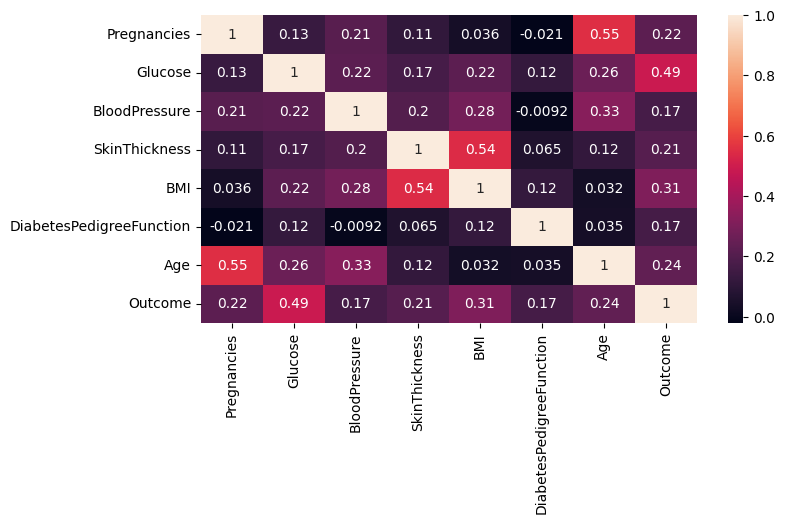

In [7]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(diabetes_data.corr(), annot=True);

Из строки Outcome видно, что наибольшей корреляцией с целевым признаком обладают факторы Glucose (уровень глюкозы) и BMI (индекс массы тела).

Построим диаграмму рассеяния, по оси абсцисс отложим фактор Glucose, а по оси ординат — BMI. Сделаем цветовую группировку по признаку наличия диабета:

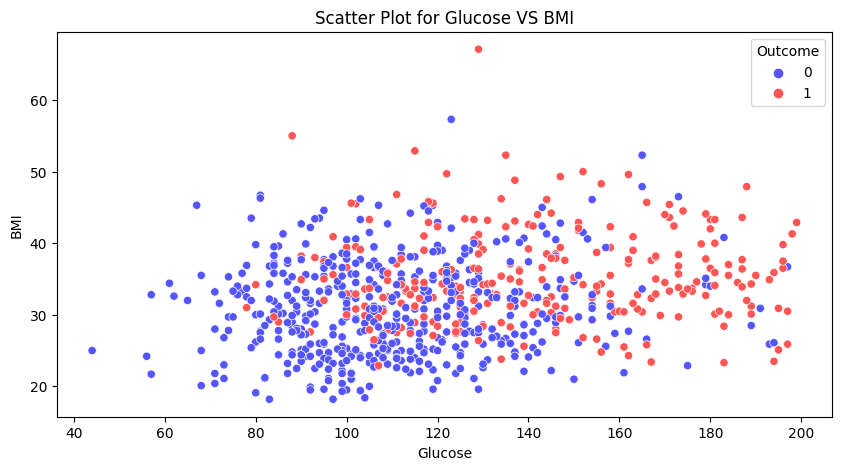

In [8]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);

#Задаём название графику
ax.set_title('Scatter Plot for Glucose VS BMI');

Видно, что классы довольно сильно перемешаны, но красные точки, соответствующие пациентам с диабетом, преимущественно сгруппированы в правой части системы координат.

Давайте попробуем построить разделяющую плоскость с помощью логистической регрессии.

Для начала разделим выборку на матрицу наблюдений X, состоящую из двух признаков, и столбец с правильным ответами y:

In [9]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

Логистическая регрессия — линейная модель, поэтому она находится в уже знакомом нам модуле linear_model из библиотеки sklearn.

In [10]:
from sklearn import linear_model #линейные модели



В модуле находится класс LogisticRegression, который реализует поиск коэффициентов разделяющей плоскости путём минимизации функции потерь logloss различными численными методами.

Кликните на плашку, чтобы увидеть информацию ↓

Основные параметры LogisticRegression

        random_state — число, на основе которого происходит генерация случайных чисел.
        penalty — метод регуляризации. Возможные значения:
            'l1' — L1-регуляризация;
            'l2' — L2-регуляризация (используется по умолчанию);
            'elasticnet' — эластичная сетка (L1+L2);
            'none' — отсутствие регуляризации.
        C — коэффициент обратный коэффициенту регуляризации, то есть равен 

        . Чем больше C, тем меньше регуляризация. По умолчанию C=1, тогда α=1.
        solver — численный метод оптимизации функции потерь logloss, может быть:
            'sag' — стохастический градиентный спуск (нужна стандартизация/нормализация);
            'saga' — модификация предыдущего, которая поддерживает работу с негладкими функциями (нужна стандартизация/нормализация);
            'newton-cg' — метод Ньютона с модификацией сопряжённых градиентов (не нужна стандартизация/нормализация);
            'lbfgs' — метод Бройдена — Флетчера — Гольдфарба — Шанно (не нужна стандартизация/нормализация; используется по умолчанию, так как из всех методов теоретически обеспечивает наилучшую сходимость);
            'liblinear' — метод покоординатного спуска (не нужна стандартизация/нормализация).
        max_iter — максимальное количество итераций, выделенных на сходимость.

Обучим логистическую регрессию, сделав значением параметра random_state, например, число 42 (традиционное число, которое означает ответ на вопрос о смысле жизни), чтобы гарантировано получить одинаковые результаты. Остальные параметры оставим по умолчанию.

Для обучения модели необходимо просто вызвать метод fit(), передав в него матрицу наблюдений X и вектор правильных ответов y.

Чтобы получить параметр , нужно обратиться к атрибуту intercept_, а вектор параметров  , , ..., будет храниться в атрибуте coef_ (так как в матрице X два фактора, то и коэффициента будет два):

In [11]:
#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минимизируя logloss
log_reg_2d.fit(X, y)
#Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_)) #остальные параметры модели w1, w2, ..., wm

# w0: [-8.24898965]
# w1, w2: [[0.03779275 0.0875742 ]]

w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


В отличие от линейной регрессии, коэффициенты логистической регрессии интерпретировать сложнее. Мы не будем этим заниматься.

Как нам сделать предсказание вероятности наличия диабета у пациента?

Мы должны подставить значения факторов в уравнение разделяющей плоскости, а затем результат подставить в функцию сигмоиды. Как хорошо, что для этого есть метод predict_proba().

Например, появился новый пациент с концентрацией глюкозы 180 мг/100мл и индексом массы тела в
кгм. Мы хотим вычислить вероятность наличия/отсутствия диабета у данного пациента:

In [14]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание вероятностей:
y_new_proba_predict = log_reg_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 2)))

# Predicted probabilities: [[0.05 0.95]]

Predicted probabilities: [[0.05 0.95]]


/home/egor/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Метод predict_proba() возвращает сразу две вероятности: первая соответствует вероятности принадлежности к классу 0 (диабета нет), а вторая — вероятности принадлежности к классу 1 (диабет есть). Заметьте, что в сумме две вероятности дают 1, что вполне логично, так как события взаимоисключающие.

Если мы хотим предсказать не вероятности, а сам класс (1 или 0), нам пригодится метод predict(). По умолчанию метод predict() относит объект к классу 1, если вероятность принадлежности к классу 1 > 0.5, и к классу 0, если эта вероятность < 0.5.

In [17]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание класса:
y_new_predict = log_reg_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

# Predicted probabilities: [1]

Predicted class: [1]


/home/egor/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Чтобы красиво визуализировать вероятности в виде тепловой карты, мы подготовили для вас специальную функцию — plot_probabilities_2d().

Данная функция принимает три аргумента:

        X — матрица с наблюдениями,
        y — столбец с правильными ответами,
        model — модель, с помощью которой делается предсказание вероятностей.


→ Мы не будем подробно останавливаться на работе данной функции — она нам нужна только для красивой визуализации, но если вы захотите разобраться, мы написали подробные комментарии к каждой строчке кода.

In [18]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

Теперь вызовем нашу функцию и посмотрим, как логистическая вероятность делит пространство на две части.

/home/egor/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


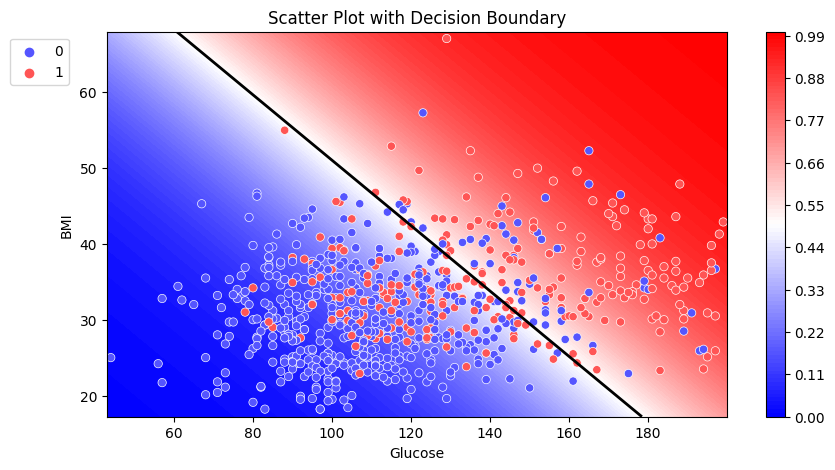

In [19]:
plot_probabilities_2d(X, y, log_reg_2d)

Мы видим разделяющую поверхность (обозначена чёрной линией). Она делит пространство на две части: красное соответствует точкам, которые будут отнесены моделью к классу 1, а синее соответствует точкам, которые будут отнесены моделью к классу 0.

Справа от графика есть цветовая панель, которая показывает значение вероятности того, что пациент болен диабетом (по мнению модели).

Обратите внимание, что чем более точка удалена от разделяющей плоскости, тем с большей вероятностью модель относит её к тому или иному классу. На тепловой карте это прослеживается в интенсивности синего и красного цвета.

Из графика видно, что довольно много синих точек попали в красную зону и наоборот. Видимо, информации о двух факторах всё же маловато для того, чтобы хорошо провести классификацию.

Давайте будем использовать для построения модели всю предоставленную нам информацию — все факторы из набора данных. Для этого заново создадим матрицу наблюдений X и вектор ответов y:



In [20]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

Затем обучим модель логистической регрессии с помощью метода fit().

Сделаем предсказание вероятности заболевания диабетом для каждого пациента и самих классов с помощью методов predict_proba() и predict().

In [21]:
#Создаём объект класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минимизируя logloss
log_reg_full.fit(X, y)
#Делаем предсказание класса
y_pred = log_reg_full.predict(X)

Затем добавим предсказание в таблицу X для наглядности:

In [22]:
#Создадим временную таблицу X
X_temp = X.copy()
#Добавим в эту таблицу результат предсказания
X_temp['Prediction'] = y_pred
X_temp.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


Итак, мы сделали предсказание для каждого наблюдения (пациента) из таблицы X.

К сожалению, теперь, когда признаков больше двух, построить красивую визуализацию разделяющей плоскости не получится.

→ Но как же тогда узнать, насколько хорошо модель определяет наличие диабета у пациента? Для этого используются метрики классификации, о которых мы поговорим в следующем юните.

Задание 2.9

Для выполнения задания скачайте набор данных.

Таблица состоит из трёх столбцов:

        X_1 и X_2 — факторы;
        y — целевой признак.

Обучите модель логистической регрессии для предсказания целевого признака y. В качестве алгоритма оптимизации используйте стохастический градиентный спуск (масштабировать данные не нужно). В качестве значения параметра random_state возьмите число 42, остальные параметры оставьте по умолчанию.

Воспользуйтесь функцией plot_probabilities_2d(), которую мы объявили ранее. Постройте визуализацию разделяющей поверхности.

Сколько объектов класса 0 будут неверно отнесены моделью к классу 1?

In [23]:
data = pd.read_csv('data/task_data.csv')
data.head()


,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


In [24]:
y = data['y']
X = data[['X_1', 'X_2']]

In [25]:
log_reg = linear_model.LogisticRegression(random_state=42)
log_reg.fit(X, y)
y_pred = log_reg.predict(X)

/home/egor/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


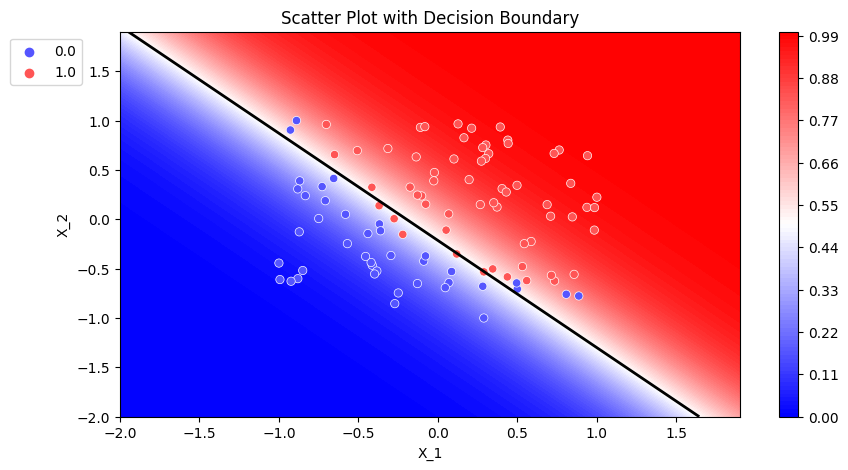

In [27]:
plot_probabilities_2d(X, y, log_reg)

# 3. Метрики классификации. Мультиклассовая классификация

✍ Мы научились обучать модель логистической регрессии, чтобы решать с её помощью задачу классификации. Теперь мы познакомимся с метриками классификации, чтобы научиться оценивать качество модели.

МЕТРИКИ КЛАССИФИКАЦИИ

Будем рассматривать метрики для задачи регрессии на следующем примере. Мы выбрали случайным образом десять пациентов из нашей таблицы и предсказали для них моделью log_reg_full ответы:

Все метрики, которые мы рассмотрим, основаны на матрице ошибок. С неё мы и начнём наш разбор.

Матрица ошибок (confusion matrix) показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

Допустим, у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов.

Назовём класс 1 положительным исходом (positive), а класс 0 — отрицательным исходом (negative).

Тогда матрица ошибок классификации будет выглядеть следующим образом:

img

Матрице соответствуют четыре возможных исхода классификации:

        True Positive (TP) — количество ответов, обозначенных моделью как класс 1 () и действительно являющихся классом 1 ().
        False Positive (FP) — количество ответов, обозначенных моделью как класс 1 (), но в действительности являющихся классом 0 ().
        False Negative (FN) — количество ответов, обозначенных моделью как класс 0 (), но в действительности являющихся классом 1 ().
        True Negative (TN) — количество ответов, обозначенных моделью как класс 0 () и действительно являющихся классом 0 ().

Для наглядности можно представить предсказания модели следующей схемой:

Давайте посмотрим, как будет выглядеть матрица ошибок для нашего примера предсказаний модели log_reg_full:
		
	TP = 4 	FP = 2
	FN = 3 	TN = 1

Примечание. Нередко в русской литературе вы можете встретить перевод метрики accuracy как «точность», однако так же на русский язык переводится метрика precision, о которой мы поговорим далее. Поэтому, если вы используете термин «точность», старайтесь указывать, о какой именно метрике (accuracy или precision) идёт речь.

На основе матрицы ошибок составляются следующие метрики классификации ↓ 

Accuracy (достоверность) — доля правильных ответов модели среди всех ответов. Правильные ответы — это истинно положительные (True Positive) и истинно отрицательные ответы (True Negative):

Интерпретация: как много (в долях) модель угадала ответов.

Метрика изменяется в диапазоне от 0 до 1. Чем ближе значение к 1, тем больше ответов модель «угадала». 

Рассчитаем accuracy для нашего примера:

Итак, наша accuracy равна 0.5, то есть модель сделала верное предсказание для 50 % пациентов из выборки.

Accuracy — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. Она бесполезна, если классы сильно несбалансированы.

Допустим, мы хотим оценить работу спам-фильтра почты. Спам-письма обозначены как Positive (1), а не-спам-письма — как Negative (0).

У нас есть 100 не-спам-писем, 90 из которых наш классификатор определил верно (True Negative = 90, False Positive = 10), и 10 спам-писем, 5 из которых классификатор также определил верно (True Positive = 5, False Negative = 5).

Тогда accuracy:

Однако представим, что мы просто будем предсказывать все письма как не спам, то есть True Positive = 100, True Negative = 0, False Positive = 10, False Negative = 0.

Тогда accuracy будет равна:

Метрика выросла, однако, наша «модель» не обладает никакой предсказательной силой, так как изначально мы хотели определять письма со спамом. 

Преодолеть это нам поможет переход с общей для всех классов метрики к отдельным показателям качества классов.



Precision (точность), или PPV (Positive Predictive Value) — это доля объектов, которые действительно являются положительными, по отношению ко всем объектам, названным моделью положительными.

Диаграмма будет выглядеть так:

img

Метрика также изменяется от 0 до 1. 

Интерпретация: способность отделить класс 1 от класса 0. Чем больше precision, тем меньше ложных попаданий. 

Именно precision не позволяет записать все ответы в один класс, так как в таком случае резко возрастает значение False Positive и метрика снижается.

Рассчитаем precision для нашего примера:

Таким образом, количество названных моделью больных диабетом и при этом действительно являющихся больными составляет 67 % от всех пациентов.

Precision нужен в задачах, где от нас требуется минимум ложных срабатываний. Чем выше «цена» ложноположительного результата, тем выше должен быть precision.

Например, по камерам видеонаблюдения мы автоматически выявляем признаки драки на улицах и отправляем наряд полиции для урегулирования конфликта. Однако штат сотрудников сильно ограничен, реагировать на любой признак конфликта мы не можем, поэтому мы хотим уменьшить количество ложных вызовов. В такой ситуации мы выберем такую модель, у которой наибольший precision.

В предельном случае (когда precision равен 1) у модели отсутствуют ложные срабатывания.

Recall (полнота), или TPR (True Positive Rate) — это доля объектов, названных классификатором положительными, по отношению ко всем объектам положительного класса.

Диаграмма:

img

Метрика изменяется от 0 до 1.

Интерпретация: способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что ложные срабатывания не влияют на recall. 

Рассчитаем recall для нашего примера:

Итак, процент пациентов, которых модель определила к классу больных диабетом, среди всех действительно больных диабетом составляет 57 %.

Recall очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1.

Например, это различные диагностические задачи с серьёзными заболеваниями. В таких задачах последствия будут негативнее, если мы примем больного пациента за здорового, чем если мы примем здорового за больного. Нам важно охватить всех потенциально больных пациентов, чтобы сделать дополнительный анализ и удостовериться в результате.

Предельный случай (когда recall равен 1) означает, что модель нашла все объекты класса 1, например всех действительно больных пациентов. Однако метрика ничего не скажет о том, с какой точностью мы это сделали.

Метрики precision и recall не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что увеличение одной из метрик может привести к уменьшению другой.

Концентрация только на одной метрике (precision или recall) без учёта второй — сомнительная идея.

В битве за максимум precision для класса 1 побеждает модель, которая всегда будет говорить говорить «нет». У неё вообще не будет ложных срабатываний.

В битве за максимум recall для класса 1 побеждает модель, которая всегда будет говорить «да». Она охватит все наблюдения класса 1. 

В реальности необходимо балансировать между двумя этими метриками.

Классическим примером является задача определения оттока клиентов.

Очевидно, что мы хотим найти как можно больше клиентов, которые потенциально могут уйти от нас. Чтобы повысить их лояльность, мы планируем использовать ресурсы колл-центра. Однако они ограничены и мы не можем звонить всем клиентам. Определив стратегию и ресурс для удержания клиентов, мы можем подобрать нужные пороги по precision и recall. Например, можно сосредоточиться на удержании только высокодоходных клиентов или тех, кто уйдёт с большей вероятностью. 

В таком случае нам подойдёт следующая метрика.

(F-мера) — это взвешенное среднее гармоническое между precision и recall:

где  — это вес precision в метрике: чем больше , тем больше вклад.

В частном случае, когда , мы получаем равный вклад для precision и recall, а формула будет выражать простое среднее гармоническое, или метрику (-мера):

Рассчитаем метрику для нашего примера:

В чём преимущество -меры?

Метрика равна своему максимуму (1), если и precision, и recall равны 1. Но если хотя бы одна из метрик будет близка к 0, то и будет близка к 0. 

Несмотря на отсутствие бизнес-интерпретации, метрика является довольно распространённой и используется в задачах, где необходимо выбрать модель, которая балансирует между precision и recall.

Например, если цена дополнительной диагностики заболевания очень высока, то есть ложных срабатываний должно быть минимум, но при этом нам важно охватить как можно больше больных пациентов. 

## РАСЧЁТ МЕТРИК НА PYTHON

→ Скачайте ноутбук с кодом. Это ноутбук из предыдущего юнита — если вы скачали его ранее, заново скачивать не нужно.

Теперь давайте посмотрим, как можно произвести расчёт метрик на Python.

Весь набор функций для вычисления метрик в sklearn находится в модуле metrics. Давайте его импортируем:

In [28]:
from sklearn import metrics

Функции, которые нам понадобятся:

        confusion_matrix() — расчёт матрицы ошибок,
        accuracy_score() — расчёт accuracy,
        precision_score() — расчёт precision,
        recall_score() — расчёт recall,
        f1_score() — расчёт -меры.

Каждая из этих функций первым аргументом принимает истинные ответы , а вторым аргументом — предсказанные значения целевой переменной .

Давайте составим матрицы ошибок для моделей log_reg_2d и log_reg_full, которые мы обучили в прошлом юните.

Для этого сделаем предсказание наличия диабета для всех пациентов с помощью каждой из моделей:

## МУЛЬТИКЛАССОВАЯ КЛАССИФИКАЦИЯ

✍ Ранее мы с вами рассмотрели основы бинарной классификации. Но что делать, когда классов, на которые необходимо разделить данные, больше 2? Например, классификация автомобилей по различным маркам или определение национальности по фотографии и т. д.

В таком случае используется очень простой подход, который называется «один против всех» (one-vs-over).

Идея этого подхода очень простая. Если у нас есть различных классов (), давайте обучим классификаторов, каждый из которых будет предсказывать вероятности принадлежности каждого объекта к определённому классу.

Например, у нас есть три класса, обозначенные как 0, 1 и 2. Тогда мы обучаем три классификатора: первый из них учится отличать класс 0 от классов 1 и 2, второй — класс 1 от классов 0 и 2, а третий — класс 2 от классов 1 и 0. Таким образом, класс, на который «заточен» классификатор, мы обозначаем как 1, а остальные классы — как 0.

Когда каждая из трёх моделей сделает предсказание вероятностей для объекта, итоговый классификатор будет выдавать класс, который соответствует самой «уверенной» модели.

Схематично это можно представить следующим образом:

Если мы используем в качестве классификатора логистическую регрессию и количество факторов равно двум ( и ), то можно изобразить тепловую карту вероятностей принадлежности к каждому из классов в каждой точке пространства, а также разделяющие плоскости, которые образуются при пороге вероятности в 0.5. 

На тепловых картах каждый класс обозначен своим цветом: 0 — зелёным, 1 — жёлтым, 2 — синим. Чем ярче цвет, тем выше вероятность принадлежности к каждому к классу в этой области пространства.

В результате у нас получится три различных пространства вероятностей, что-то вроде трёх параллельных реальностей. Чтобы собрать всё это воедино, мы выбираем в каждой точке пространства максимум из вероятностей. Получим следующую картину:

Модель логистической регрессии легко обобщается на случай мультиклассовой классификации. Пусть мы построили несколько разделяющих плоскостей с различными наборами параметров , где — номер классификатора. То есть имеем разделяющих плоскостей:

Чтобы преобразовать результат каждой из построенных моделей в вероятности в логистической регрессии, используется функция softmax — многомерный аналог сигмоиды:

Данная функция выдаёт нормированные вероятности, то есть в сумме для всех классов вероятность будет равна 1.

## МУЛЬТИКЛАССОВАЯ КЛАССИФИКАЦИЯ НА PYTHON

Давайте посмотрим, как логистическая регрессия решает задачу мультиклассовой классификации. 

Возьмём датасет о пингвинах из библиотеки seaborn:

In [34]:
penguins_data = sns.load_dataset('penguins')
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


img

Описание данных:

        species — класс пингвина ('Adelie', 'Chinstrap', 'Gentoo'), целевой признак;
        island — остров, на котором живёт пингвин ('Torgersen', 'Biscoe', 'Dream');
        bill_length_mm — длина клюва в миллиметрах;
        bill_depth_mm — толщина клюва в миллиметрах;
        flipper_length_mm — длина крыльев;
        body_mass_g — масса;
        sex — пол ('Male', 'Female').

Наша цель — предсказать класс пингвина.

Очевидно, что классификация является мультиклассовой, так как возможных значений три.

Для начала давайте посмотрим на пропуски в данных:

In [35]:
penguins_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Итак, в некоторых столбцах есть пропуски.

Логистическая регрессия — модель, которая не умеет работать с пропусками. Чтобы не получить ошибку, необходимо произвести предварительную предобработку. Для простоты давайте удалим все строки, содержащие пропуски в данных:

In [36]:
penguins_data = penguins_data.dropna()

Теперь, когда пропусков в данных больше нет, разделим набор данных на матрицу наблюдений X и столбец с ответами y.

In [37]:
X = penguins_data.drop('species', axis=1)
y = penguins_data['species']
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


Данные содержат строковые категориальные столбцы — island и sex. Логистическая регрессия не умеет работать со строковыми значениями. Необходимо произвести кодирование категориальных признаков. 

Примечание. Кодировать целевую переменную y не нужно, даже если она представлена в виде строковых значений. Это не влияет на работу модели.

Воспользуемся функцией get_dummies() из библиотеки pandas для произведения «горячего» кодирования.



In [38]:
X_dummies = pd.get_dummies(X)
X_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1


Теперь данные готовы для подачи в модель.

Создаём модель логистической регрессии, значение параметра multi_class выставляем на 'multinomial' (мультиклассовая классификация), max_iter — на 1000 (для обеспечения сходимости), random_state=42.

Затем обучим модель с помощью метода fit() и сделаем предсказание вероятностей принадлежности к каждому из классов с помощью метода predict_proba() и самих классов — с помощью метода predict(). Вероятности округлим до второго знака после запятой.

In [39]:
#Создаём объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(
    multi_class='multinomial', #мультиклассовая классификация
    max_iter=1000, #количество итераций, выделенных на сходимость
    random_state=42 #генерация случайных чисел
)
 
#Обучаем модель 
log_reg.fit(X_dummies, y)
#Делаем предсказание вероятностей
y_pred_proba = np.round(log_reg.predict_proba(X_dummies), 2)
#Делаем предсказание класса
y_pred = log_reg.predict(X_dummies)

/home/egor/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
#Создаём DataFrame из вероятностей
y_pred_proba_df = pd.DataFrame(
    y_pred_proba, 
    columns=['Adelie', 'Chinstrap', 'Gentoo']
)
#Создаём DataFrame из предсказанных классов
y_pred_df = pd.DataFrame(
    y_pred, 
    columns=['Predicted Class']
)
#Объединяем таблицы по вертикальной оси
y_df = pd.concat([y_pred_proba_df, y_pred_df], axis=1)
#Выбираем пять случайных строк
y_df.sample(5, random_state=2)

,Adelie,Chinstrap,Gentoo,Predicted Class
277,0.00,0.00,1.0,Gentoo
223,0.00,0.00,1.0,Gentoo
7,0.77,0.23,0.0,Adelie
160,0.00,1.00,0.0,Chinstrap
65,1.00,0.00,0.0,Adelie


Из таблицы можно проследить, как происходит предсказание класса пингвина на основе полученных вероятностей. Видно, что выбирается класс, вероятность принадлежности к которому максимальна.

Например, для строки под номером 7 логистическая регрессия предсказала три вероятности: 0.79 — вероятность принадлежности к классу Adelie, 0.21 — к классу Chinstrap и 0 — к классу Gentoo. На основе этих вероятностей было сделано предсказание и модель отнесла пингвина в строке 7 к классу Adelie.

Вот так и происходит мультиклассовая классификация. 

Давайте посмотрим, как в таком случае будет выглядеть отчёт о метриках:

In [41]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



Для мультиклассовой классификации к отчёту просто добавляется новая строка, соответствующая третьему классу. 

Из отчёта видно, что наша модель идеально решила задачу классификации (все метрики равны 1), то есть классы оказались линейно разделимыми.

## ДОСТОИНСТВА И НЕДОСТАТКИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ 

Давайте обобщим всё вышесказанное и приведём достоинства и недостатки логистической регрессии.



        Простой, интерпретируемый, но в то же время эффективный алгоритм. Благодаря этому он очень популярен в мире машинного обучения.
        Поиск параметров линейный или квадратичный (в зависимости от метода оптимизации), то есть ресурсозатратность алгоритма очень низкая.
        Не требует подбора внешних параметров (гиперпараметров), так как практически не зависит от них.



        Алгоритм работает хорошо, только когда классы линейно разделимы, что в реальных задачах бывает очень редко. Поэтому обычно данная модель используется в качестве baseline.

В завершение изучения логистической регрессии можно добавить, что недостаток с линейной разделимостью классов можно побороть с помощью введения полиномиальных признаков, тем самым снизив смещение модели. Тогда логистическая регрессия вместо разделяющей плоскости будет означать выгнутую разделяющую поверхность сложной структуры.

Однако мы знаем, что с этим трюком стоит быть аккуратным, так как можно получить переобученную модель. Поэтому в комбинации с полиномиальными признаками стоит подобрать наилучший параметр регуляризации.

img



На рисунке выше изображены три различные модели:

        первая — простая логистическая регрессия;
        вторая — логистическая регрессия, обученная на полиномиальных признаках второй степени;
        третья — логистическая регрессия, обученная на полиномиальных признаках десятой степени.

Видно, что первая модель обладает низким качеством и не обобщает общей зависимости (у неё высокое смещение). Третья же, напротив, идеально выделяет каждое наблюдение в правильный класс, но является переобученной и также не отражает общей зависимости (у неё высокий разброс). Оптимальной моделью является вторая, которая не подстраивается под индивидуальные наблюдения и отражает общую зависимость в данных.


# 5. Деревья решений

✍ В этом юните мы познакомимся с ещё одним семейством моделей машинного обучения — деревьями решений. Для начала поговорим о том, что такое дерево решений и как с его помощью решают задачу классификации.

Деревья решений являются одним из наиболее понятных человеку и в то же время мощных алгоритмов принятия решений. К тому же на их основе строятся самые эффективные ансамблевые модели машинного обучения, такие как случайный лес, о котором мы поговорим далее.

Алгоритмы на основе деревьев решений могут использоваться как для решения задач классификации, так и для регрессии. В этом модуле мы разберём задачу классификации, а в дальнейшем, когда будем разбирать математическую составляющую алгоритмов, поговорим о том, как научить дерево решать задачу регрессии.

Если коротко, решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил. Этот процесс в некотором смысле согласуется с естественным для человека процессом принятия решений.

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ДЕРЕВЕ РЕШЕНИЙ

Начнём сразу с примера.

Представьте, что у вас есть автомобиль, который вы решили застраховать. Вы приходите в страховую компанию, где вам дают заполнить анкету. По этой анкете сотрудник страховой компании будет принимать решение, стоит ли выдавать вам страховку.

Сотрудник в свою очередь будет руководствоваться примерно следующим регламентом:

        Если возраст владельца > 40 лет, то:
            Если место эксплуатации автомобиля — город , то:
                Если стаж > 10 лет, то:
                    Застраховать.
                Если стаж < 10 лет, то:
                    Не страховать.
            Если место эксплуатации автомобиля — сельская местность, то:
                Застраховать.
        Если возраст владельца ≤ 40 лет, то:
            Если аварий не было зафиксировано, то:
                Застраховать.
            Если были аварии, то:
                Если тип автомобиля — минивэн, то:
                    Застраховать.
                Если тип автомобиля — спорткар, то:
                    Не страховать.

То есть сотрудник при принятии решения использует информацию, предоставленную вами в анкете, и подает её на вход вложенного условного оператора.

Для простоты восприятия можно представить такой подход визуально в виде следующего дерева:

img

Аналогичным образом работает и алгоритм машинного обучения под названием «дерево решений» (Decision Tree). 

Если дерево уже обучено, то есть уже сформулированы условия в прямоугольниках, то, когда в страховую компанию придёт новый автовладелец, сотруднику будет достаточно прогнать данные клиента через дерево решений и таким образом принять решение, то есть произвести классификацию.

Вот ещё один пример дерева решений. Большинство из нас когда-нибудь играли в игру «Слова на лбу» или «Тарантинки». На лоб каждого из игроков приклеивается бумажка с написанным на ней словом. Игрок может задавать другим игрокам вопросы о загаданном ему предмете/животном/человеке и т. д. Другие игроки могут отвечать на вопросы только «Да» и «Нет». Цель — за минимальное количество вопросов догадаться, о чём идёт речь.

Логика «если …, то …» используется людьми повседневно и поэтому интуитивно понятна каждому из нас. На основании этих рассуждений можно построить мощный алгоритм машинного обучения.

Деревья решений находят своё применение во множестве прикладных задач.

Успешнее всего деревья применяют в следующих областях:

        Банковское дело. Оценка кредитоспособности клиентов банка при выдаче кредитов.
        Промышленность. Контроль качества продукции (обнаружение дефектов в готовых товарах), испытания без нарушений (например, проверка качества сварки) и т. п.
        Медицина. Диагностика заболеваний разной сложности.
        Молекулярная биология. Анализ строения аминокислот.
        Торговля. Классификация клиентов и товара.

 

Теперь перейдём к формальной части. Нам важно уже сейчас познакомиться с терминологией деревьев решений, чтобы понять общий принцип их обучения.

Пусть у нас есть всё та же матрица наблюдений X, в которой содержатся наблюдения и характеризующие их признаки (привычный нам DataFrame), и правильные ответы y — метки классов. 

Дадим определение дереву решений и его составляющим ↓

Формально структура дерева решений — это связный ациклический граф. Что это значит?

Граф — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.

Связный граф — это граф, в котором между любой парой существует направленная связь.

Ациклический граф — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.


        Корневая вершина (root node) — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. В примере со страхованием это был вопрос «Возраст автовладельца > 40».
        Внутренние вершины (intermediate nodes) — это дополнительные уточняющие вопросы, которые дерево задаёт объекту. 
        Листья (leafs) — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.

Максимально возможная длина от корня до самых дальних листьев (не включая корневую) называется максимальной глубиной дерева (max depth).

Во внутренней или корневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся всё глубже по дереву. Например, «Количество кредитов 1». 

Логический критерий, который находится в каждой вершине, называется предикатом, или решающим правилом.

На самом деле все предикаты — это просто взятие порога по значению какого-то признака. Формально это записывается следующим образом:

Предикат вершины дерева   (где  — это номер вершины) равен 1 («Да»), если признак меньше либо равен значению , и 0 («Нет») — в противном случае. Функция с квадратными скобками — это уже знакомая нам индикаторная функция: она равна 1, если условие внутри скобок выполняется, и 0 — в противном случае.

Примечание. В зависимости от реализации предикат может быть с условием  или . В реализации sklearn используется условие . Но вы можете встретить другую формулировку предикатов в иных реализациях или в литературе.

Если результат предиката равен 1, то мы переходим по левой ветви дерева к следующему узлу, в противном случае — по правой ветви дерева к следующему узлу.

А что насчёт геометрии?

Каждый новый вопрос дерева решений при его обучении разбивает пространство признаков на две части: в первую часть отправляются наблюдения, для которых предикат истинен, а во вторую — для которых он ложен.

Посмотрим, как это будет выглядеть, на примере. 

Вам уже знакома задача классификации про ирисы. Ирисы Фишера — это задача, на которой Рональд Фишер ещё в 1936 году (почти 100 лет назад!) продемонстрировал работу алгоритма, разделяющего ирисы на сорта в зависимости от параметров долей околоцветника.

Пусть у нас есть следующие признаки:

        длина внутренней доли околоцветника (англ. petal length);
        ширина внутренней доли околоцветника (англ. petal width).

На основании этих двух признаков требуется разделить ирисы на три сорта:

        ирис щетинистый (Iris Setosa);
        ирис виргинский (Iris virginica);
        ирис разноцветный (Iris versicolor).

Пусть мы обучили на этих данных дерево решений с максимальной глубиной 1. Оно получилось вот таким:

## ПРОЦЕСС ПОСТРОЕНИЯ ДЕРЕВА РЕШЕНИЙ

✍ Существует множество стратегий построения деревьев решений. Мы рассмотрим стратегию, реализованную в библиотеке sklearn, — алгоритм CART (Classification and Regression Tree), который предназначен для построения бинарных деревьев решений (деревьев, у которых каждая вершина связана с двумя другими вершинами нижнего уровня). Данный алгоритм, как следует из его названия, предназначен для решения задач классификации и регрессии.

Внимательный студент уже заметил, что построение дерева решений можно описать рекурсией. Каждая вершина дерева порождает две других вершины, а они в свою очередь порождают новые вершины, и так происходит до тех пор, пока не выполнится некоторый критерий остановки, например в вершине не останутся только наблюдения определённого класса.

Примечание. Если вы забыли, что такое рекурсия, рекомендуем вам вернуться к модулю по продвинутому использованию функций и активировать рекурсивное мышление, оно нам понадобится.

Пусть у нас есть матрица наблюдений X и столбец с ответами — метками классов y. На основе примеров и ответов мы хотим построить дерево решений, которое будет производить классификацию.

Итак, псевдокод рекурсивной функции для построения решающего дерева будет выглядеть следующим образом (запускать код не нужно, так как он является абстрактным):

In [ ]:
def build_decision_tree(X, y):
    node = Node()
    if stopping_criterion(X, y) is True:
        node = create_leaf_with_prediction(y)
        return node 
    else:
        X_left, y_left, X_rigth, y_rigth = best_split(X, y)
        node.left = build_decision_tree(X_left, y_left)
        node.right = build_decision_tree(X_rigth, y_rigth)

Разберёмся, как работает алгоритм:
1. Создать новую вершину node.

На первой итерации это будет корневая вершина. На последующих это будут внутренние вершины.

2. Проверить некоторый критерий остановки stop_criterion().

Например, критерием остановки может быть следующее условие: все объекты, которые попали в вершину, — это объекты одного и того же класса.

Или достигнута максимальная глубина дерева (max_depth), например 5. Это значит, что дерево не будет продолжать делиться, если глубина уже равна 5.

Другой критерий: число наблюдений в листе (в sklearn этот параметр обозначен как min_samples_leaf) меньше заданного, например 7. Это значит, что при выполнении такого условия дерево продолжит делиться в том случае, если решающее правило выполняется как минимум для 7 наблюдений.

2.1 Если условие остановки выполняется:

Проверить, какой класс преобладает в текущей вершине. Превратить текущую вершину дерева в лист, где всем наблюдениям, которые попали в эту вершину, присвоить метку преобладающего класса.

Прекратить построение дерева, вернув из алгоритма полученный лист.

2.2. Если условие остановки не выполняется:

Среди всех возможных предикатов

найти такой, который обеспечивает разбиение выборки наилучшим образом.

То есть нужно найти такой признак и пороговое значение , при которых достигается максимум некоторой информативности (существуют разные меры информативности, о них поговорим ниже). Назовём эту часть алгоритма некоторой абстрактной функцией best_split().

Например, в нашем примере с ирисами это был предикат

. Он обеспечил наилучшее разделение пространства на две части.

В результате разбиения будут созданы два набора данных:

        X_left, y_left (левый), для которого выполняется условие ;
        X_right, y_right (правый), для которого условие не выполняется.

Создаются две новые вершины: левая и правая, в каждую из которых отправляется соответствующий набор данных.

То есть происходит рекурсивный вызов функции build_decision_tree(), и для каждой новой вершины алгоритм повторяется вновь с новым набором данных.

Примечание. Вершина дерева node задаёт целое поддерево идущих за ним вершин, если такие имеются, а не только саму вершину.

Центральный момент в построении дерева решений по обучающему набору данных — найти такой предикат

, который обеспечит наилучшее разбиение выборки на классы. 

Как дерево определяет, какой вопрос нужно задать в каждой из вершин? 

Например, в задаче кредитного скоринга мы можем задавать множество различных вопросов в разной последовательности. Предикаты в первой вершине могут быть различными:

        возраст заёмщика  25 лет,
        возраст заёмщика  40 лет,
        размер кредита  1000 $,
        наличие детей  0.5 (если наличие детей — бинарный категориальный признак: 1 — есть дети, 0 — нет детей),
        и так далее.

Видно, что на место и можно подставить любой признак и порог соответственно.

Признак и его пороговое значение в каждой из вершин и есть внутренние параметры дерева решений, которые мы пытаемся отыскать. Это аналог коэффициентов уравнения линейной и логистической регрессий. 

## ДЕРЕВЬЯ РЕШЕНИЙ В SKLEARN

Работать будем с теми же данными о диабете:

In [42]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


Ранее мы с вами уже выбрали два наиболее коррелированных с целевой переменной признака: Glucose и BMI. Давайте вспомним, как выглядит диаграмма рассеяния, разделённая по цвету целевой переменной, признаком наличия диабета (Outcome):

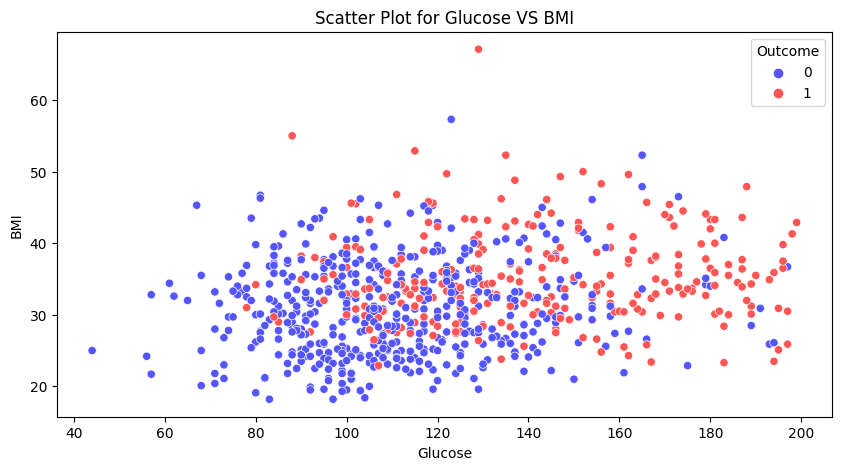

In [43]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Scatter Plot for Glucose VS BMI');

Создадим матрицу наблюдений X из признаков Glucose и BMI и столбец с правильными ответами y из признака Outcome:

In [44]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

Будем решать задачу классификации пациентов с помощью дерева решений.

Модель дерева решений, его модификаций, а также функции для работы с деревьями находятся в модуле tree библиотеки sklearn. Импортируем его:

In [45]:
from sklearn import tree #модели деревьев решения

Модель дерева решений для решения задачи классификации реализована в классе DecisionTreeClassifier. Данный класс реализует обучение по алгоритму CART.

Кликните на плашку, чтобы увидеть информацию ↓

Основные параметры DecisionTreeClassifier

        criterion — критерий информативности ('gini' — критерий Джини и 'entropy' — энтропия Шеннона).
        max_depth — максимальная глубина дерева (по умолчанию — None, глубина дерева не ограничена).
        max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве (по умолчанию — None, то есть обучение производится на всех признаках). Нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
        min_samples_leaf — минимальное число объектов в листе (по умолчанию — 1). У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те решающие правила, которые верны как минимум для пяти объектов.
        random_state — число, отвечающее за генерацию случайных чисел.

Давайте обучим дерево решений с критерием информативности criterion='entropy' (энтропия Шеннона), максимальной глубиной max_depth=3 и параметром random_state=42.

За обучение, как всегда, отвечает метод fit(). Данный метод реализует построение дерева решений по алгоритму CART, который мы рассматривали выше (алгоритм немного оптимизирован разработчиками sklearn, но смысл ровно тот же).

In [46]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности 
    max_depth=3, #максимальная глубина
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

Итак, мы обучили дерево решений. Обученное дерево можно визуализировать в виде графа, чтобы посмотреть, как дерево делает предсказание. Для этого есть функция plot_tree() из модуля tree.

Основные параметры функции:

        decision_tree — объект обученного дерева решений,
        feature_names — наименования факторов,
        class_names — названия классов,
        filled — добавлять ли расцветку вершин графа.

Вызовем эту функцию:

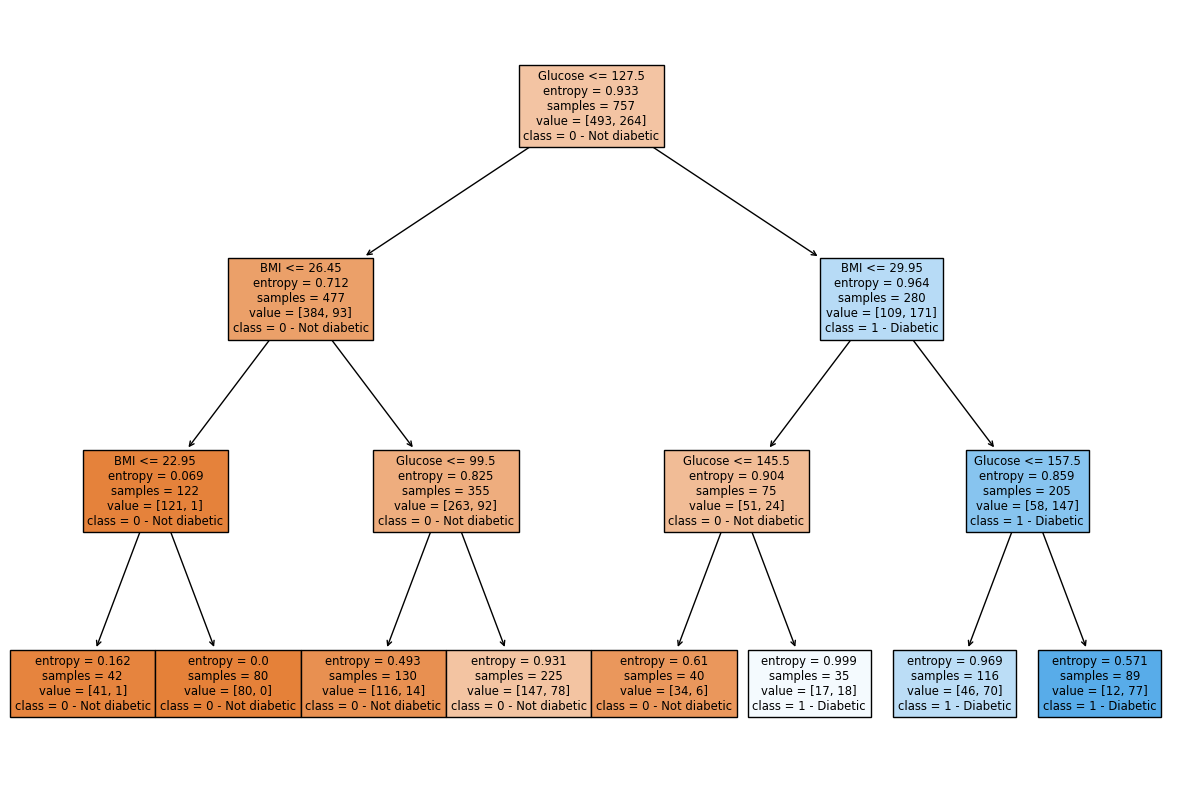

In [47]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree.plot_tree(
    dt_clf_2d, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

img

В каждой из вершин записана следующая информация:

        предикат, по которому происходит разбиение;
        entropy — значение энтропии в текущей выборке;
        samples — количество объектов;
        values — количество объектов каждого из классов;
        class — преобладающий класс, на основе которого будет сделано предсказание.

Как такое дерево будет делать предсказание?

Например, появился новый пациент с концентрацией глюкозы 180 мг/100 мл и индексом массы тела

кгм. Мы хотим вычислить вероятность наличия/отсутствия диабета у такого пациента.

«Прогоняем» характеристики пациента через предикаты в вершинах графа. Если предикат равен True, то идём по левому ребру вглубь графа, а если False — по правому.

        [Glucose <= 127.5] = False. Переходим в правую вершину.

        [BMI <= 29.49] = False. Переходим в правую вершину.

        [Glucose <= 157.5] = False. Переходим в правую вершину.

        Мы добрались до листовой вершины, которая соответствует объектам класса 1 — Diabetic. Значит, дерево определит данного пациента как больного диабетом.

        Вероятность наличия диабета в данном листе равна 

.

Вероятность отсутствия диабета:

        .

Описанные выше операции дерево производит автоматически с помощью функций predict() — для предсказания класса объекта.

In [48]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание класса:
y_new_predict = dt_clf_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))
# Predicted class: [1]

Predicted class: [1]


/home/egor/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


И predict_proba() — для предсказания вероятности принадлежности к каждому из классов:

In [49]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание вероятностей:
y_new_proba_predict = dt_clf_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 3)))

# Predicted probabilities: [[0.135 0.865]]

Predicted probabilities: [[0.135 0.865]]


/home/egor/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Давайте посмотрим, как будет выглядеть разделяющая поверхность дерева решений для двух признаков. Для этого воспользуемся функцией plot_probabilities_2d(), которую мы вам представляли в прошлом юните:

In [50]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

Вызовем нашу функцию для визуализации:

/home/egor/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


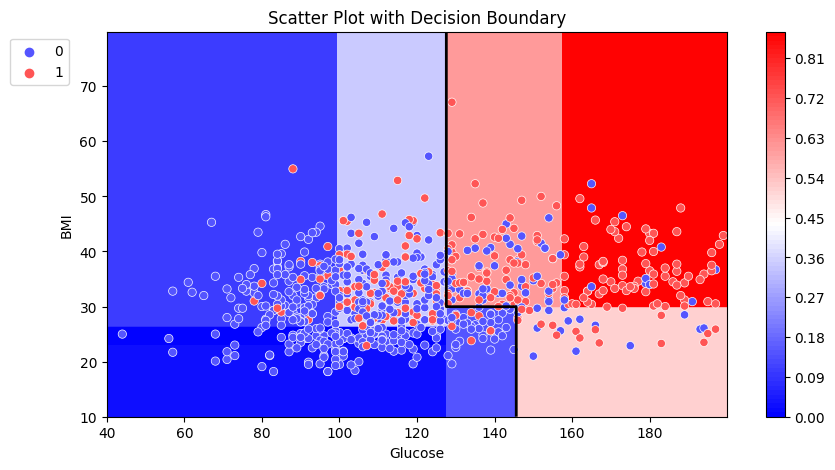

In [51]:
plot_probabilities_2d(X, y, dt_clf_2d)

Как и ожидалось, дерево решений разделило пространство на множество прямоугольных частей, каждая из которых соответствует определённому листу дерева.

Количество этих областей равно количеству листьев — 8.

Примечание. Так как вероятности в двух областях практически совпадают, на тепловой карте разница незаметна, области сливаются в одну и вы видите семь областей.

Попробуйте самостоятельно сопоставить построенное пространство с графом дерева решений, который мы построили выше.

Каждая часть пространства также соответствует определённой вероятности наличия диабета. Отследить её можно с помощью цветовой панели.

Чёрным обозначена граница, где вероятность наличия диабета равна 0.5. Точки, находящиеся правее этой разделяющей границы, относятся деревом к классу 1, а левее, — к классу 0.

Теперь вернитесь в юнит по логистической регрессии и сравните то, как дерево решений и логистическая регрессия делят пространство факторов на части.

Можно рассчитать полученные метрики качества. Для этого предскажем наличие диабета для всех пациентов из матрицы наблюдений X, а затем рассчитаем метрики классификации с помощью функции classification_report() из библиотеки sklearn:

In [52]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_2d.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



→ Если сравните данный отчёт с полученным ранее для логистической регрессии, обученной на двух признаках, вы увидите, что даже с небольшой глубиной 3 дерево решений решает задачу классификации лучше, чем логистическая регрессия.

Давайте построим дерево решений без ограничения его максимальной глубины. Для этого нам просто не нужно задавать параметр max_depth:

In [53]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART без ограничения его длины
dt_clf_bad.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Сделаем предсказание:

In [54]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_bad.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



Потрясающе! Как выросли метрики! Мы практически идеально решаем задачу предсказания наличия диабета. Задача, над которой бьются медики всего мира, решается простейшим алгоритмом машинного обучения с потрясающей точностью! Причём для диагностики нам достаточно всего двух признаков — уровня глюкозы и индекса массы тела.

Не кажется ли вам, что здесь что-то не так?

Давайте визуализируем граф (осторожно, код может выполняться в течение нескольких десятков секунд):

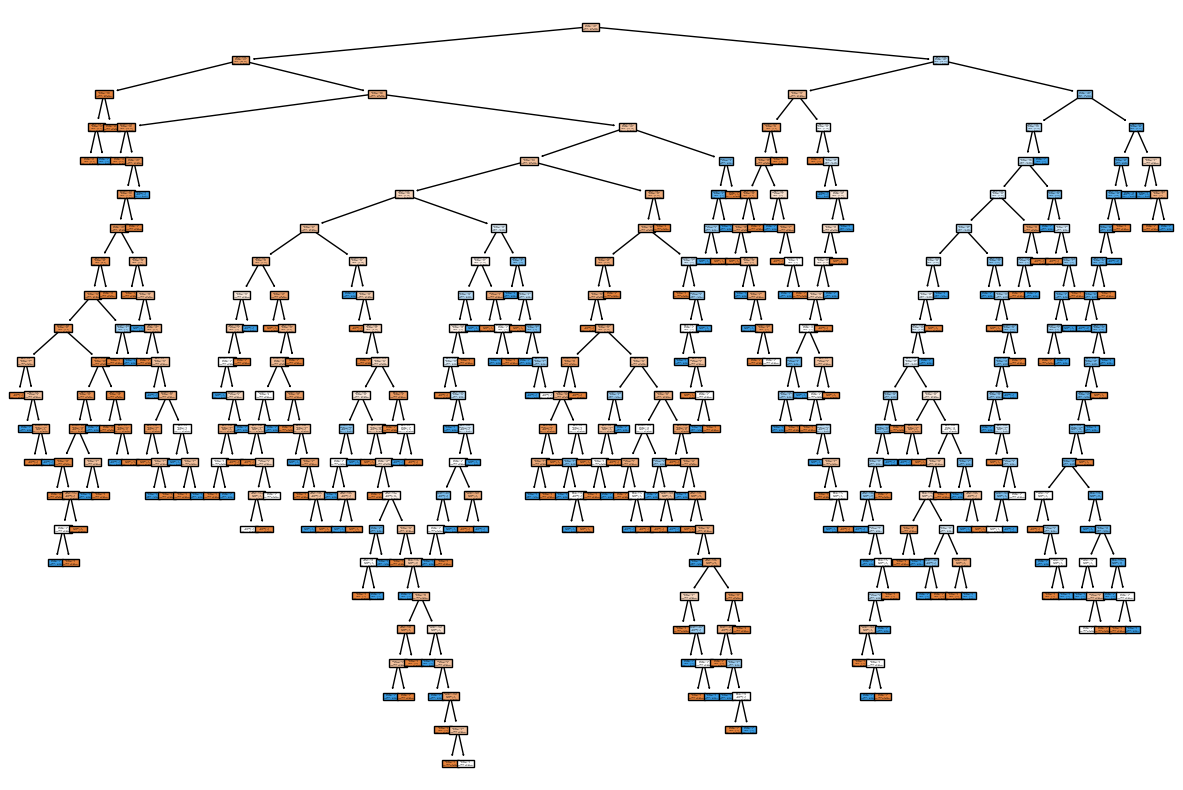

In [55]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф 
tree_graph = tree.plot_tree(
    dt_clf_bad, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

Абсолютный хаос. Дерево задаёт огромное количество вопросов для того, чтобы предсказать правильный диагноз для каждого пациента из набора данных. Дерево настолько глубокое, что даже не помещается на экране.

Примечание. Посмотреть получившуюся глубину дерева можно с помощью метода get_depth():

In [56]:
dt_clf_bad.get_depth()
# 22

22

А теперь давайте посмотрим на разделяющую поверхность:

/home/egor/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


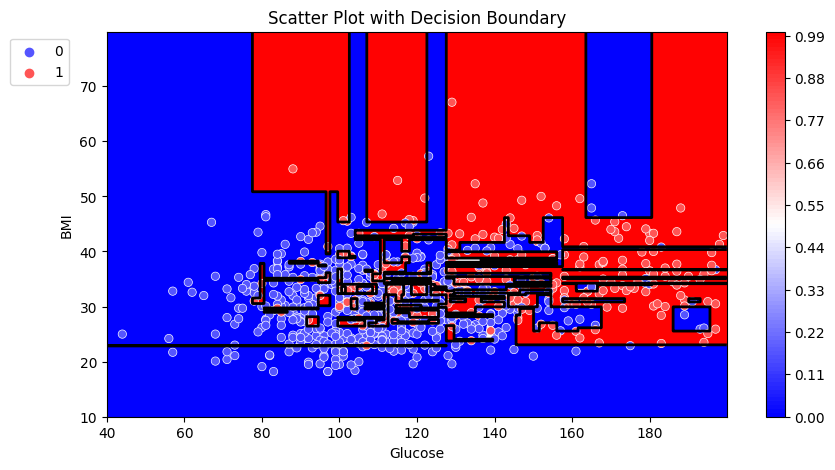

In [57]:
plot_probabilities_2d(X, y, dt_clf_bad)

Перед нами типичная картина переобучения дерева решений. Дерево решений разделило пространство на огромное количество отдельных частей, чтобы обозначить все точки из обучающего набора данных правильным классом (уменьшить энтропию до нуля).

Конечно же, такая модель не имеет никакой обобщающей способности и никому не нужна.

Важно!

Всегда используйте регуляризацию деревьев — ограничивайте их максимальную глубину (max_depth) и минимальное число объектов в листе (min_samples_leaf).

К тому же всегда стоит иметь под рукой не только обучающий, но и тестовый набор данных, чтобы оценить переобучение. Об этом мы поговорим в финальном практическом юните.

Давайте попробуем обучить дерево решений на всех признаках. Принцип остаётся тем же, меняется только матрица наблюдений X:

In [58]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

Будем использовать дерево решений с максимальной глубиной 6 (мы подобрали её заранее, при такой максимальной глубине наблюдается наименьшее переобучение).

Обучим модель на всех признаках с помощью метода fit(), затем сделаем предсказание с помощью метода predict() и выведем отчёт о метриках классификации с помощью функции classification_report():



In [59]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       493
           1       0.84      0.69      0.76       264

    accuracy                           0.85       757
   macro avg       0.84      0.81      0.82       757
weighted avg       0.84      0.85      0.84       757



Метрики значительно улучшились по сравнению с обучением на двух признаках.

Напоследок расскажем о ещё одной полезной особенности дерева решений. Она заключается в том, что дерево решений позволяет определить важность признаков.

Важность признаков можно посмотреть, обратившись к атрибуту feature_importance_:

In [60]:
print(dt_clf_full.feature_importances_)

[0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465
 0.14000868]


Значения, которые будут выведены в качестве элементов массива, и есть коэффициенты важности каждого из признаков. Для удобства обычно строят столбчатую диаграмму:

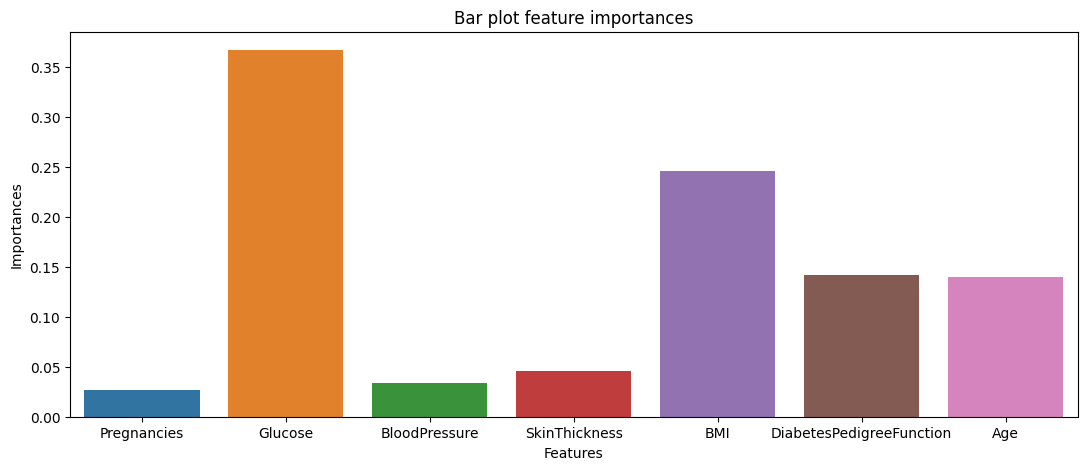

In [61]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = dt_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

Далее эту информацию можно использовать для интерпретации значимости каждого из признаков для предсказания.

Часто «древесные» модели используются в качестве методов для отбора наиболее важных признаков. Это важно, когда в вашем наборе данных большое количество признаков, из-за которых обучение более сложных моделей может стать очень длительным. 

Кроме того, значимость признаков можно использовать в рамках анализа бизнес-процессов. Значимость позволяет понять, на какие признаки стоит обратить наибольшее внимание, чтобы повысить, например, точность их измерения.

Примечание. Не стоит приравнивать значимость к корреляции. Корреляция — это коэффициент линейной зависимости, а значимость может отражать и нелинейные связи (в зависимости от сложности дерева).

Задание 5.10

Для выполнения задания используйте датасет о диабете из данного модуля. Для обучения используйте все доступные признаки.

Обучите дерево решений с максимальной глубиной 6 и критерием информативности Джини. В качестве значения параметра random_state возьмите число 42.

Сделайте предсказание и рассчитайте -меру.

Чему равно значение метрики? Ответ запишите с точностью до второго знака после точки-разделителя.

In [65]:
dt_class_all = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    random_state=42
)

dt_class_all.fit(X, y)
y_all = dt_class_all.predict(X)
print(metrics.classification_report(y, y_all))
print(f'F1 score is {round(metrics.f1_score(y, y_all), 2)}')

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       493
           1       0.85      0.73      0.78       264

    accuracy                           0.86       757
   macro avg       0.85      0.83      0.84       757
weighted avg       0.86      0.86      0.86       757

F1 score is 0.78


# 6. Введение в ансамбли: бэггинг. Случайный лес

✍ Одна модель хорошо, а много — лучше! С этой фразы мы с вами приоткрываем дверь в удивительный мир ансамблевых моделей.

Ансамблевые модели или просто ансамбли (ensembles) — это метод машинного обучения, где несколько простых моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же задачи и объединяются для получения лучших результатов.

Необходимость использования ансамблей может возникнуть тогда, когда вы уже нашли хорошую модель и никак больше не можете повысить её качество. В этом случае можно перейти к более продвинутому методу: использовать не одну модель (пусть и очень хорошую), а ансамбли моделей.

Ансамбли — передовые алгоритмы для решения сложных задач машинного обучения. Сегодня они и нейронные сети являются главными конкурентами и дают наилучшие результаты, благодаря чему используются крупными компаниями в продакшене.

→ В этом модуле мы коснёмся основой идеи использования ансамблей на примере бэггинга и посмотрим на его реализацию для решения задач классификации в библиотеке sklearn, а в дальнейшем разберёмся, что за математическая «магия» стоит за ансамблевыми методами.

Говоря простыми словами, ансамбли — это объединение простых моделей в одного гиганта. Но объединять модели можно как угодно: например, взять тысячу разных логистических регрессий, а затем на их предсказаниях построить дерево решений, линейную регрессию или вообще нейронную сеть. А можно обучить сотню деревьев решений — построить целый лес, а для предсказания взять среднее. Вариаций объединения может быть сколько угодно.

Существует три проверенных способа построения ансамблей:

        Бэггинг — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
        Бустинг — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
        Стекинг — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.

Об ансамблях типов бустинг и стекинг мы поговорим чуть позже в модуле, посвящённом продвинутым методам машинного обучения. В этом модуле разберёмся, что из себя представляет бэггинг и причём тут деревья решений.

## БЭГГИНГ. ОСНОВНЫЕ ИДЕИ

В 1906 г. в городе Плимут (Великобритания) на сельской ярмарке был проведён эксперимент. Фрэнсис Гальтон в качестве развлечения посетителей ярмарки предложил им на глаз оценить вес выставленного на всеобщее обозрение быка. За правильные ответы организаторы шоу обещали призы. В результате в голосовании приняли участие около 800 человек — как заядлых фермеров, так и людей, далёких от скотоводческих дел. Собрав после этой ярмарки все результаты, Гальтон высчитал среднее арифметическое значение для всей выборки — 1197 фунтов. Реальный же вес быка оказался 1198 фунтов. Каким-то непостижимым образом разношерстная публика дала ответ, максимально приближенный к реальному показателю. То есть ответ публики был точнее, чем ответ отдельно взятого эксперта, например мясника или скотовода.

По схожему принципу «голосования толпы» и работает бэггинг.

Бэггинг (bagging) — это алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

В основе алгоритма лежит статистический метод, который называется бутстрэпом (bootstrap). Идея бутстрэпа заключается в генерации выборок размера (бутстрэп-выборок) из исходного набора данных размера путём случайного выбора элементов с повторениями в каждом из наблюдений. 

Схематично работу метода можно представить следующим образом:



Мы взяли исходный набор данных размером  наблюдений и сгенерировали бутстрэп-выборки размером наблюдений. Обратите внимание, что наблюдения в выборках могут повторяться.

В частном случае можно генерировать выборки того же размера, то есть . Таким образом, мы из набора данных создаём датасетов из исходного того же размера.

Примечание. Такие бутстрэп-выборки часто используются для оценки различных статистических показателей (например, разброса или доверительного интервала). Если вычислять статистические оценки на нескольких независимых выборках, то мы можем оценить их разброс. Поиск большого количества независимых выборок сложен в силу того, что для этого требуется слишком много данных. Поэтому мы используем бутстрэп, чтобы создать несколько выборок.

Давайте обучим одинаковых моделей на каждой из сгенерированных выборок, сделаем предсказания, а затем усредним их. Так мы получим бэггинг.

Схематично такой подход можно описать следующим образом:

img

Примечание. В случае классификации «усреднение» означает мажоритарное голосование (принцип большинства голосов). То есть объект относится к тому классу, за который проголосовало большинство алгоритмов.

Важно отметить, что в бэггинге в голосовании принимает участие модель одного вида. Эта модель называется базовой моделью (base model). Нельзя обучить на половине сгенерированных наборов данных логистические регрессии, а на второй половине — деревья решений.

Когда мы будем разбирать математическое обоснование ансамблей, мы докажем следующие два утверждения:

        Смещение (bias) бэггинг-ансамбля не больше () смещения одного алгоритма из этого ансамбля.
        Однако разброс (variance) бэггинг-ансамбля в раз меньше, чем разброс одного алгоритма из ансамбля, где — количество алгоритмов в ансамбле.

Что это значит в переводе с математического?

Теорема гарантирует, что средняя ошибка ансамбля, построенного по принципу бэггинга, не выше, чем средняя ошибка базовой модели, но при этом шанс переобучения алгоритма значительно ниже.

Это очень важно для моделей, склонных к переобучению, таких как глубокие деревья решений.

## СЛУЧАЙНЫЙ ЛЕС

Случайный лес (Random Forest) — это самая распространённая реализация бэггинга, основанная на использовании в качестве базовой модели дерева решений. 

Помимо бутстрэпа, случайный лес использует метод случайных подпространств. Суть этого метода заключается в том, что каждая модель обучается не на всех признаках, а только на части из них. Такой подход позволяет уменьшить коррелированность между ответами деревьев и сделать их независимыми друг от друга.

Алгоритм построения случайного леса для задачи классификации

Пусть количество объектов в наборе данных равно N, а количество признаков — M. То есть размер набора данных — (N, M). Количество деревьев в лесу равно K. Тогда для обучения случайного леса необходимо выполнить следующие шаги:

        С помощью бутстрэпа создать K наборов данных размера (N, M).
        Для каждого сгенерированного набора данных применить метод случайных подпространств: выбрать L < M случайных признаков и получить K новых наборов данных размером (N, L).
        На каждом наборе данных обучить K деревьев решений.

Когда поступят новые данные, нам нужно будет прогнать их через каждое дерево и объединить результаты отдельных деревьев мажоритарным голосованием или путём комбинирования вероятностей.

Ниже приведена схема работы описанного алгоритма для решения задачи классификации. Для простоты лес состоит из четырёх деревьев (K=4).

Давайте посмотрим, как работает алгоритм случайного леса, на примере. 

Пусть у нас есть набор данных со следующими факторами:

        — возраст,
        — группа крови,
        — доход в тысячах рублей.

Целевой признак () — подвергался ли человек операции хотя бы раз в жизни (1 — да, 0 — нет).

Тогда, если мы обучим алгоритм случайного леса на представленных данных, мы получим следующую картину:

Количество объектов в наборе данных N=5, а количество факторов — M=3 (+1 целевой признак, его мы не включаем в размерность). Таким образом, размер таблицы наблюдений — (5, 3). Количество деревьев в лесу K=4.

        На первом этапе алгоритма мы формируем K=4 бутстрэп выборки размером (5, 3), выбирая из таблицы строки случайным образом с возможностью повторения.
        На втором этапе мы случайным образом выбираем L=2 признаков из каждой таблицы и получаем четыре выборки размером (5, 2).
        На третьем этапе мы обучаем K=4 деревьев решений, каждое на своей выборке.

Обратите внимание, что деревья, из которых состоит лес, могут быть различной глубины и структуры в зависимости от того, насколько просто была разделима поданная выборка.

Теперь, когда поступят новые данные, нам останется только подать их на вход каждого из деревьев, получить предсказания, а затем усреднить их путём мажоритарного голосования и получить ответ: